In [15]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# init_printing(False)
init_printing(True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import itable
import pandas as pd

In [65]:
# Manually fill in your eigenvalues and their conjugates
s_0 = np.complex(-8.86543452, 193.12025573)
s_1 = np.complex(-6.16048902, 23.85384142)
s_2 = np.complex(-3.86158342, 11.80060906)
s_3 = np.complex(-0.37627902, 2.90612422)
s_4 = np.complex(-0.69490035, 5.64215371)

s_0_star = np.conjugate(s_0)
s_1_star = np.conjugate(s_1)
s_2_star = np.conjugate(s_2)
s_3_star = np.conjugate(s_3)
s_4_star = np.conjugate(s_4)

n = int(5)
m = int(2)
l = int(np.ceil((2*n) / (m + 1)))

In [66]:
g_0_0 = 79.3732622239622
g_0_1 = 54.4807395251969
g_0_2 = -33.1395721984242
g_0_3 = -206.311330965075
g_0_4 = 44.5043856793014

g_1_0 = -93.0751361694004
g_1_1 = 26.672179292523
g_1_2 = -48.8796261437363
g_1_3 = 31.3590897937735
g_1_4 = -41.1508965795407

g_2_0 = 457.021489715405
g_2_1 = 116.751865515491
g_2_2 = 0
g_2_3 = -35294.1176470588
g_2_4 = 1784.49497089898

In [114]:
a_full = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(10000):
    steps = np.linspace(0,1,10000)
    T = steps[i]
    P = np.array([[g_0_0, g_0_0*np.exp(-s_0*T), g_0_0*np.exp(-s_0*2*T), g_0_0*np.exp(-s_0*3*T), g_0_0*np.exp(-s_0*4*T),

        g_1_0, g_1_0*np.exp(-s_0*T), g_1_0*np.exp(-s_0*2*T), g_1_0*np.exp(-s_0*3*T),g_1_0*np.exp(-s_0*4*T),

        g_2_0, g_2_0*np.exp(-s_0*T), g_2_0*np.exp(-s_0*2*T), g_2_0*np.exp(-s_0*3*T),g_2_0*np.exp(-s_0*4*T)],


        [g_0_0, g_0_0*np.exp(-s_0_star*T), g_0_0*np.exp(-s_0_star*2*T), g_0_0*np.exp(-s_0_star*3*T),g_0_0*np.exp(-s_0_star*4*T),

        g_1_0, g_1_0*np.exp(-s_0_star*T), g_1_0*np.exp(-s_0_star*2*T), g_1_0*np.exp(-s_0_star*3*T),g_1_0*np.exp(-s_0_star*4*T),

        g_2_0, g_2_0*np.exp(-s_0_star*T), g_2_0*np.exp(-s_0_star*2*T), g_2_0*np.exp(-s_0_star*3*T),g_2_0*np.exp(-s_0_star*4*T)],


        [g_0_1, g_0_1*np.exp(-s_1*T), g_0_1*np.exp(-s_1*2*T), g_0_1*np.exp(-s_1*3*T),g_0_1*np.exp(-s_1*4*T),

        g_1_1, g_1_1*np.exp(-s_1*T), g_1_1*np.exp(-s_1*2*T), g_1_1*np.exp(-s_1*3*T),g_1_1*np.exp(-s_1*4*T),

        g_2_1, g_2_1*np.exp(-s_1*T), g_2_1*np.exp(-s_1*2*T), g_2_1*np.exp(-s_1*3*T),g_2_1*np.exp(-s_1*4*T)],


        [g_0_1, g_0_1*np.exp(-s_1_star*T), g_0_1*np.exp(-s_1_star*2*T), g_0_1*np.exp(-s_1_star*3*T),g_0_1*np.exp(-s_1_star*4*T),

        g_1_1, g_1_1*np.exp(-s_1_star*T), g_1_1*np.exp(-s_1_star*2*T), g_1_1*np.exp(-s_1_star*3*T),g_1_1*np.exp(-s_1_star*4*T),

        g_2_1, g_2_1*np.exp(-s_1_star*T), g_2_1*np.exp(-s_1_star*2*T), g_2_1*np.exp(-s_1_star*3*T),g_2_1*np.exp(-s_1_star*4*T)],


        [g_0_2, g_0_2*np.exp(-s_2*T), g_0_2*np.exp(-s_2*2*T), g_0_2*np.exp(-s_2*3*T),g_0_2*np.exp(-s_2*4*T),

        g_1_2, g_1_2*np.exp(-s_2*T), g_1_2*np.exp(-s_2*2*T), g_1_2*np.exp(-s_2*3*T),g_1_2*np.exp(-s_2*4*T),

        g_2_2, g_2_2*np.exp(-s_2*T), g_2_2*np.exp(-s_2*2*T), g_2_2*np.exp(-s_2*3*T),g_2_2*np.exp(-s_2*4*T)],


        [g_0_2, g_0_2*np.exp(-s_2_star*T), g_0_2*np.exp(-s_2_star*2*T), g_0_2*np.exp(-s_2_star*3*T),g_0_2*np.exp(-s_2_star*4*T),

        g_1_2, g_1_2*np.exp(-s_2_star*T), g_1_2*np.exp(-s_2_star*2*T), g_1_2*np.exp(-s_2_star*3*T),g_1_2*np.exp(-s_2_star*4*T),

        g_2_2, g_2_2*np.exp(-s_2_star*T), g_2_2*np.exp(-s_2_star*2*T), g_2_2*np.exp(-s_2_star*3*T),g_2_2*np.exp(-s_2_star*4*T)],


        [g_0_3, g_0_3*np.exp(-s_3*T), g_0_3*np.exp(-s_3*2*T), g_0_3*np.exp(-s_3*3*T),g_0_3*np.exp(-s_3*4*T),

        g_1_3, g_1_3*np.exp(-s_3*T), g_1_3*np.exp(-s_3*2*T), g_1_3*np.exp(-s_3*3*T),g_1_3*np.exp(-s_3*4*T),

        g_2_3, g_2_3*np.exp(-s_3*T), g_2_3*np.exp(-s_3*2*T), g_2_3*np.exp(-s_3*3*T),g_2_3*np.exp(-s_3*4*T)],


        [g_0_3, g_0_3*np.exp(-s_3_star*T), g_0_3*np.exp(-s_3_star*2*T), g_0_3*np.exp(-s_3_star*3*T),g_0_3*np.exp(-s_3_star*4*T),

        g_1_3, g_1_3*np.exp(-s_3_star*T), g_1_3*np.exp(-s_3_star*2*T), g_1_3*np.exp(-s_3_star*3*T),g_1_3*np.exp(-s_3_star*4*T),

        g_2_3, g_2_3*np.exp(-s_3_star*T), g_2_3*np.exp(-s_3_star*2*T), g_2_3*np.exp(-s_3_star*3*T), g_2_3*np.exp(-s_3_star*4*T)],


        [g_0_4, g_0_4*np.exp(-s_4*T), g_0_4*np.exp(-s_4*2*T), g_0_4*np.exp(-s_4*3*T),g_0_4*np.exp(-s_4*4*T),

        g_1_4, g_1_4*np.exp(-s_4*T), g_1_4*np.exp(-s_4*2*T), g_1_4*np.exp(-s_4*3*T),g_1_4*np.exp(-s_4*4*T),

        g_2_4, g_2_4*np.exp(-s_4*T), g_2_4*np.exp(-s_4*2*T), g_2_4*np.exp(-s_4*3*T),g_2_4*np.exp(-s_4*4*T)],


        [g_0_4, g_0_4*np.exp(-s_4_star*T), g_0_4*np.exp(-s_4_star*2*T), g_0_4*np.exp(-s_4_star*3*T),g_0_4*np.exp(-s_4_star*4*T),

        g_1_4, g_1_4*np.exp(-s_4_star*T), g_1_4*np.exp(-s_4_star*2*T), g_1_4*np.exp(-s_4_star*3*T),g_1_4*np.exp(-s_4_star*4*T),

        g_2_4, g_2_4*np.exp(-s_4_star*T), g_2_4*np.exp(-s_4_star*2*T), g_2_4*np.exp(-s_4_star*3*T),g_2_4*np.exp(-s_4_star*4*T)],

        [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0], 
#         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#         [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
#         [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]],dtype=np.complex_)
    P_inv = np.linalg.pinv(P)
    w = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1]])
    a = np.dot(P_inv,w)
    a_row = np.real(a.reshape(1,15))
    a_full = np.vstack((a_full, a_row))
a_full = np.delete(a_full,0,0)
index=np.array([0])
# sometimes the first few values are really high positives, so alter this to skip those

In [115]:
skip = 3
for i in range(8):
    index = np.vstack((index,np.argwhere(a_full[:,i][skip:] > 0)[0][0]))
index = np.delete(index, (0), axis=0)
index_arg = np.argmax(index)
time2 = round(steps[skip:][index[index_arg][0]],4)
time3 = round(time2 * 2,4)
time4 = round(time3 * 2,4)
time5 = round(time4 * 2,4)

impulse0_0 = round(a_full[:,0][skip:][index[index_arg][0]],4)
impulse1_0 = round(a_full[:,1][skip:][index[index_arg][0]],4)
impulse2_0 = round(a_full[:,2][skip:][index[index_arg][0]],4)
impulse3_0 = round(a_full[:,3][skip:][index[index_arg][0]],4)
impulse4_0 = round(a_full[:,4][skip:][index[index_arg][0]],4)

impulse0_1 = round(a_full[:,5][skip:][index[index_arg][0]],4)
impulse1_1 = round(a_full[:,6][skip:][index[index_arg][0]],4)
impulse2_1 = round(a_full[:,7][skip:][index[index_arg][0]],4)
impulse3_1 = round(a_full[:,8][skip:][index[index_arg][0]],4)
impulse4_1 = round(a_full[:,9][skip:][index[index_arg][0]],4)

impulse0_2 = round(a_full[:,10][skip:][index[index_arg][0]],4)
impulse1_2 = round(a_full[:,11][skip:][index[index_arg][0]],4)
impulse2_2 = round(a_full[:,12][skip:][index[index_arg][0]],4)
impulse3_2 = round(a_full[:,13][skip:][index[index_arg][0]],4)
impulse4_2 = round(a_full[:,14][skip:][index[index_arg][0]],4)

print('Index Used: {}'.format(index[index_arg][0]))
df = pd.DataFrame({"Input 1":[impulse0_0,impulse1_0,impulse2_0,impulse3_0,impulse4_0], 
                   "Input 2":[impulse0_1,impulse1_1,impulse2_1,impulse3_1,impulse4_1],
                   "Input 3":[impulse0_2,impulse1_2,impulse2_2,impulse3_2,impulse4_2],
                   "Times":[0,time2,time3,time4,time5]})
itable.PrettyTable(df)

Index Used: 2297


Input 1,Input 2,Input 3,Times
0.0063,4.7518,1.6399,0.0
-0.8947,-0.6584,-2.8522,0.23
0.2886,-2.0597,3.4642,0.46
5.0824,-3.5548,-2.4257,0.92
-3.4825,2.521,1.1738,1.84


In [113]:
index = 1500
time2 = round(steps[skip:][index],4)
time3 = round(time2 * 2,4)
time4 = round(time3 * 2,4)
time5 = round(time4 * 2,4)

impulse0_0 = round(a_full[:,0][skip:][index],4)
impulse1_0 = round(a_full[:,1][skip:][index],4)
impulse2_0 = round(a_full[:,2][skip:][index],4)
impulse3_0 = round(a_full[:,3][skip:][index],4)
impulse4_0 = round(a_full[:,4][skip:][index],4)

impulse0_1 = round(a_full[:,5][skip:][index],4)
impulse1_1 = round(a_full[:,6][skip:][index],4)
impulse2_1 = round(a_full[:,7][skip:][index],4)
impulse3_1 = round(a_full[:,8][skip:][index],4)
impulse4_1 = round(a_full[:,9][skip:][index],4)

impulse0_2 = round(a_full[:,10][skip:][index],4)
impulse1_2 = round(a_full[:,11][skip:][index],4)
impulse2_2 = round(a_full[:,12][skip:][index],4)
impulse3_2 = round(a_full[:,13][skip:][index],4)
impulse4_2 = round(a_full[:,14][skip:][index],4)

print('Index Used: {}'.format(index))
df = pd.DataFrame({"Input 1":[impulse0_0,impulse1_0,impulse2_0,impulse3_0,impulse4_0], 
                   "Input 2":[impulse0_1,impulse1_1,impulse2_1,impulse3_1,impulse4_1],
                   "Input 3":[impulse0_2,impulse1_2,impulse2_2,impulse3_2,impulse4_2],
                   "Times":[0,time2,time3,time4,time5]})
itable.PrettyTable(df)

Index Used: 1500


Input 1,Input 2,Input 3,Times
-54.2563,44.5491,0.8036,0.0
21.8632,-16.5772,-1.1553,0.1503
8.9621,-7.6031,6.132,0.3006
39.5295,-28.6134,-9.6708,0.6012
-15.0986,9.2445,4.8905,1.2024


In [109]:
# a_full[:,0][skip:][index[index_arg][0]]
np.argwhere(np.logical_and(np.logical_and(np.logical_and((np.logical_and(np.greater_equal(a_full[:,0][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,2][skip:],0),
                                          np.greater_equal(a_full[:,3][skip:],0)))),
           np.logical_and((np.logical_and(np.greater_equal(a_full[:,4][skip:],0),
                                          np.greater_equal(a_full[:,5][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,6][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))))),
                          np.logical_and(np.logical_and((np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0)))),
           np.logical_and((np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0)))))))

array([[9881],
       [9882],
       [9883],
       [9884],
       [9885],
       [9886],
       [9887],
       [9888],
       [9889],
       [9890],
       [9891],
       [9892],
       [9893],
       [9894],
       [9895],
       [9896],
       [9897],
       [9898],
       [9899],
       [9900],
       [9901],
       [9902],
       [9903],
       [9904],
       [9905],
       [9906],
       [9907],
       [9908],
       [9909],
       [9910],
       [9911],
       [9912],
       [9913],
       [9914],
       [9915],
       [9916],
       [9917],
       [9918],
       [9919],
       [9920],
       [9921],
       [9922],
       [9923],
       [9924],
       [9925],
       [9926],
       [9927],
       [9928],
       [9929],
       [9930],
       [9931],
       [9932],
       [9933],
       [9934],
       [9935],
       [9936],
       [9937],
       [9938],
       [9939],
       [9940],
       [9941],
       [9942],
       [9943],
       [9944],
       [9945],
       [9946],
       [99

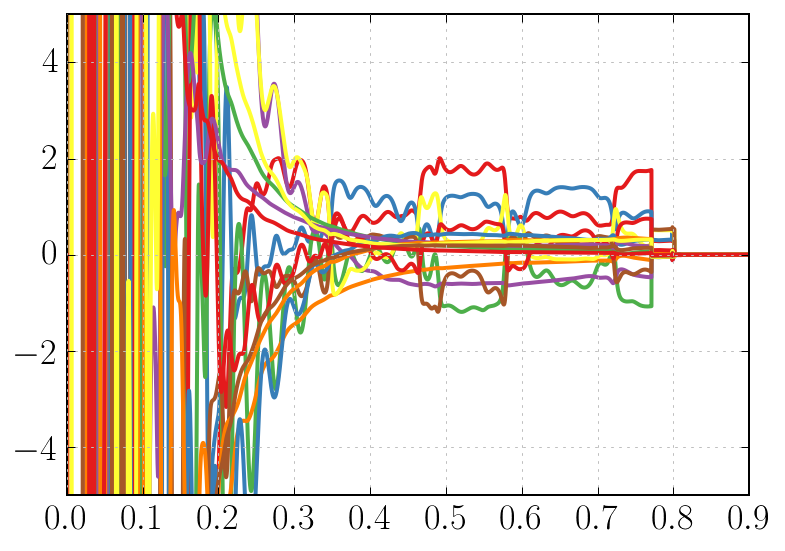

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(steps,a_full[:,0])
plt.plot(steps,a_full[:,1])
plt.plot(steps,a_full[:,2])
plt.plot(steps,a_full[:,3])
plt.plot(steps,a_full[:,4])
plt.plot(steps,a_full[:,5])
plt.plot(steps,a_full[:,6])
plt.plot(steps,a_full[:,7])
plt.plot(steps,a_full[:,8])
plt.plot(steps,a_full[:,9])
plt.plot(steps,a_full[:,10])
plt.plot(steps,a_full[:,11])
plt.plot(steps,a_full[:,12])
plt.plot(steps,a_full[:,13])
plt.plot(steps,a_full[:,14])
# ax.annotate('local max', xy=(0.1, 1), xytext=(0.2, 1),
#             arrowprops=dict(facecolor='black', shrink=0.1),
#             )
plt.ylim(-5,5)
plt.xlim(0,0.9);
plt.show()

In [81]:
a_full[:,10][skip:][1545]

In [ ]:
steps[5000:][1395]

In [ ]:
a_full[:,12][6395]

In [ ]:
for i in range(15):
    index = np.vstack((index,np.argwhere(a_full[:,i][skip:] > 0)[0][0]))

In [ ]:
index